> 由于这次作业的数据文件比较多，统一放在data文件夹下

## Machine Learning Online Class

Exercise 6 | Support Vector Machines

Instructions

------------

  This file contains code that helps you get started on the exercise. You will need to complete the following functions:

     gaussianKernel.m
     dataset3Params.m
     processEmail.m
     emailFeatures.m

For this exercise, you will not need to change any code in this file, or any other files other than those mentioned above.

In [1]:
import sys
import numpy as np
from scipy.io import loadmat
from sklearn.svm import SVC
import matplotlib.pyplot as plt
sys.path.append('../')
from ex6.visualizeBoundary import visualizeBoundary
from ex6.plotData import plotData
from ex6.gaussianKernel import gaussianKernel
from ex6.dataset3Params import dataset3Params

Loading and Visualizing Data ...


[]

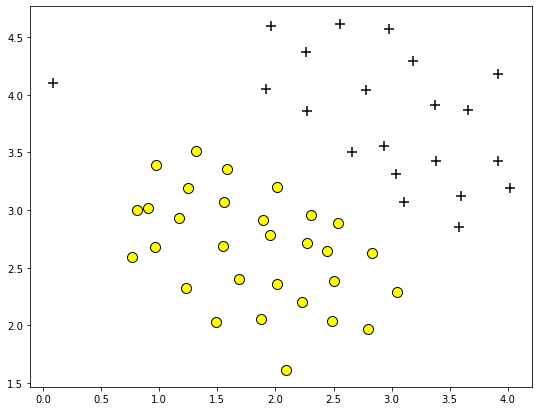

In [2]:
## =============== Part 1: Loading and Visualizing Data ================
#  We start the exercise by first loading and visualizing the dataset.
#  The following code will load the dataset into your environment and plot the data.

print('Loading and Visualizing Data ...')

# Load from ex6data1:
# You will have X, y in your environment
data = loadmat('./data/ex6data1.mat')
X, y = data['X'], data['y']
# Plot training data
ax = plotData(X, y)
plt.show()

Training Linear SVM ...


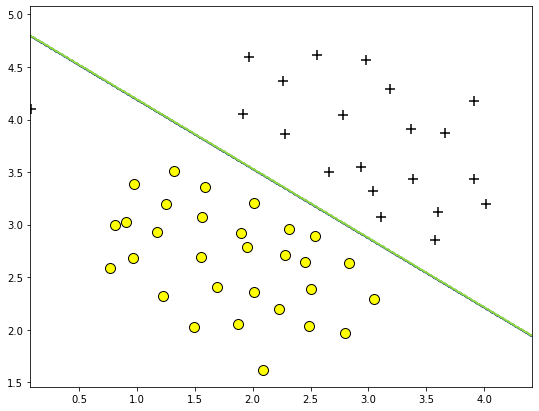

In [3]:
## ==================== Part 2: Training Linear SVM ====================
#  The following code will train a linear SVM on the dataset and plot the decision boundary learned.

# Load from ex6data1:
# You will have X, y in your environment

print('Training Linear SVM ...')

# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)
C = 1

# 源码中的svmTrain方法可以用现成的替代
model = SVC(C=C, kernel='linear')  # 线性
model.fit(X, y.ravel())  # 训练数据

# print(model.score(X, y.ravel()))  # 当前分类器的准确率

# 绘制边界
visualizeBoundary(X, y, model)
plt.show()  # 和MATLAB画出来的边界曲线有些偏差...不过差别不大

In [4]:
## =============== Part 3: Implementing Gaussian Kernel ===============
#  You will now implement the Gaussian kernel to use
#  with the SVM. You should complete the code in gaussianKernel.m
#
print('Evaluating the Gaussian Kernel ...')
x1 = np.array([[1,2,1]]).reshape(-1, 1)
x2 = np.array([[0,4,-1]]).reshape(-1,1)
sigma = 2
sim = gaussianKernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = %f :' % sigma)
print('\n\t%f\n(for sigma = 2, this value should be about 0.324652)' % sim)

Evaluating the Gaussian Kernel ...
Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2.000000 :

	0.324652
(for sigma = 2, this value should be about 0.324652)


Loading and Visualizing Data ...


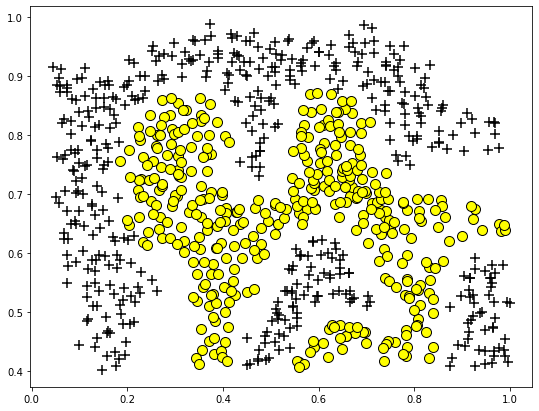

In [5]:
## =============== Part 4: Visualizing Dataset 2 ================
#  The following code will load the next dataset into your environment and plot the data.

print('Loading and Visualizing Data ...')

# Load from ex6data2:
# You will have X, y in your environment
data = loadmat('./data/ex6data2.mat')
X, y = data['X'], data['y']
# Plot training data
plotData(X, y)
plt.show()

Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...
0.9895712630359212


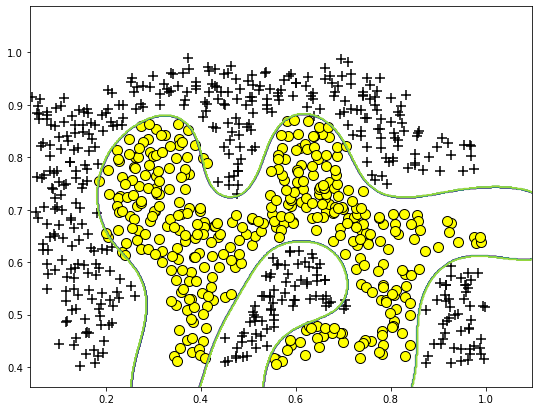

In [6]:
## ========== Part 5: Training SVM with RBF Kernel (Dataset 2) ==========
#  After you have implemented the kernel, we can now use it to train the
# SVM classifier.
print('Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...')

# SVM Parameters
C = 1
sigma = 0.1
gamma = np.power(sigma, -2) / 2  # 函数的入参gamma就是公式里的1/σ²
# We set the tolerance and max_passes lower here so that the code will run
# faster. However, in practice, you will want to run the training to convergence.
model = SVC(C=C, kernel='rbf', gamma=gamma)
model = model.fit(X, y.ravel())  # 训练数据
print(model.score(X, y.ravel()))

# print(model.score(X, y.ravel()))  # 当前分类器的准确率
visualizeBoundary(X, y, model)
plt.show()

0.9478672985781991


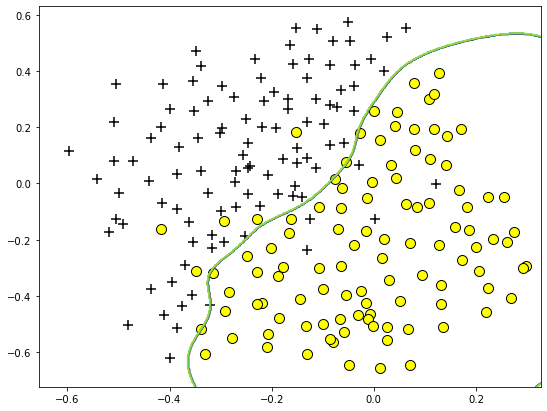

In [7]:
## ========== Part 7: Training SVM with RBF Kernel (Dataset 3) ==========

#  This is a different dataset that you can use to experiment with. Try
#  different values of C and sigma here.

# Load from ex6data3:
# You will have X, y in your environment
data = loadmat('./data/ex6data3.mat')
X, y, Xval, yval = data['X'], data['y'], data['Xval'], data['yval']

# Try different SVM Parameters here
C, sigma = dataset3Params(X, y, Xval, yval)

# Train the SVM
model = SVC(C=C, kernel='rbf', gamma=gamma)
model = model.fit(X, y.ravel())  # 训练数据
print(model.score(X, y.ravel()))
visualizeBoundary(X, y, model)